Step 1: Basic Production Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:

# Load the CSV file
data = pd.read_csv("Crop Production data.csv")

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)



Missing Values:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [3]:
# 3730 missing values in the production column
# Lets handle the missing values with the imputation method

# Describe the data to get mean, median, and mode
production_stats = data['Production'].describe()

# Calculate the mode separately
production_mode = data['Production'].mode()

# Print mean, median, and mode
print("Mean Production:", production_stats['mean'])
print("Median Production:", production_stats['50%'])  # 50% represents the median
print("Mode Production:", production_mode.iloc[0])  # Mode might return multiple values, we select the first one

production_counts = data['Production'].value_counts()

# Print the count of the mode
mode_count = production_counts.max()
print("Mode Production Count:", mode_count)

# mode count is 4028 in the whole data (which less). so mode production of 1 is rejected
# as we take median for outliers, we skip the median of 729

# The conclusion: Chosen mean imputation

Mean Production: 582503.4422509808
Median Production: 729.0
Mode Production: 1.0
Mode Production Count: 4028


In [4]:
mean_production = data['Production'].mean()
data['Production'] = data['Production'].fillna(mean_production)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)




Missing Values:
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


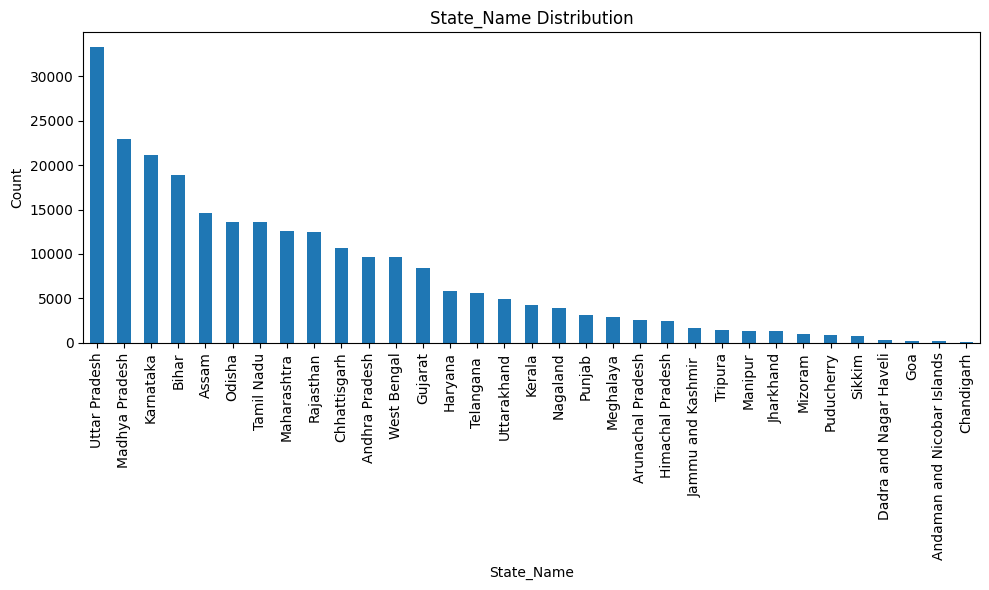

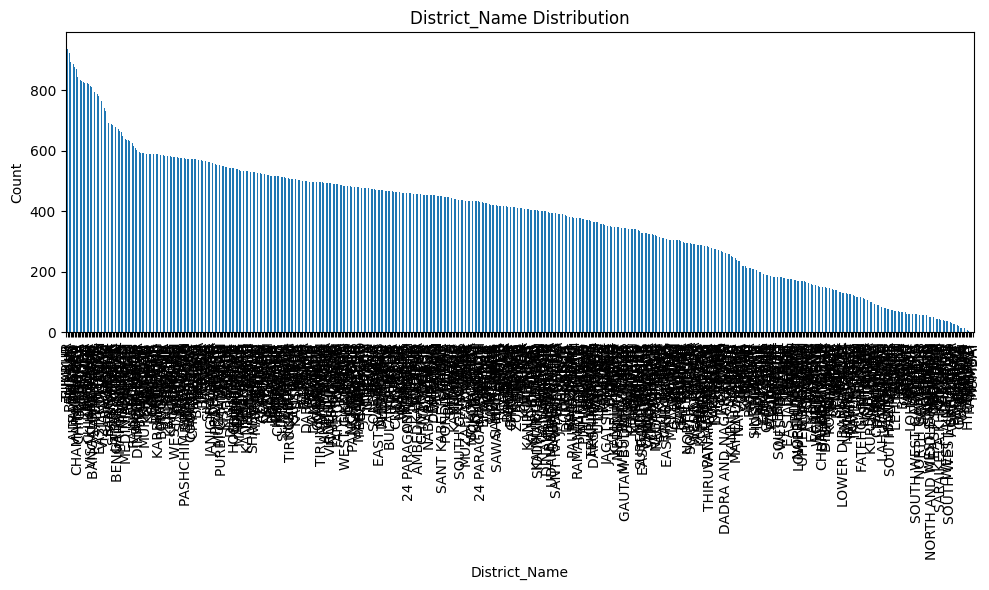

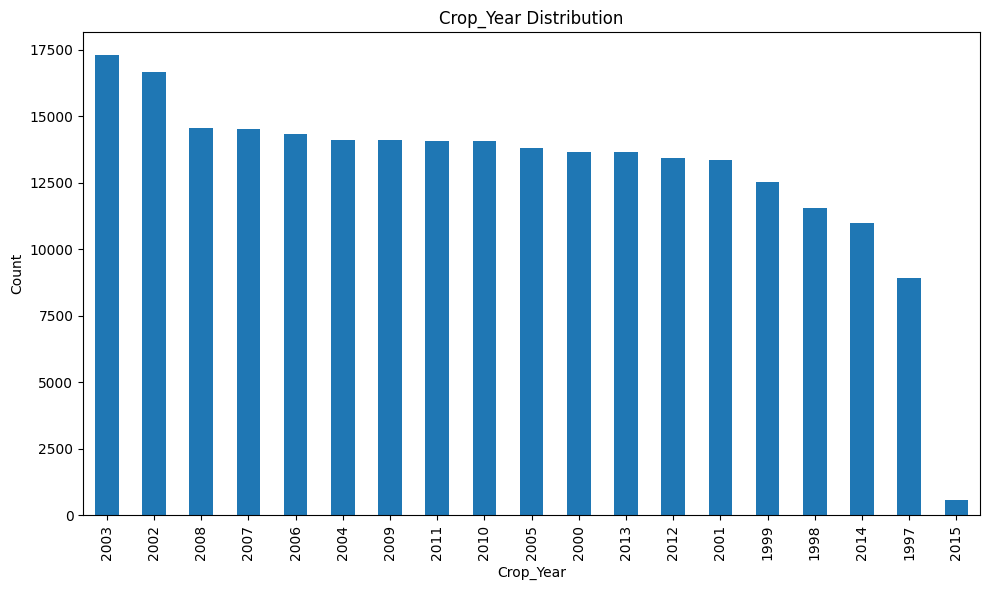

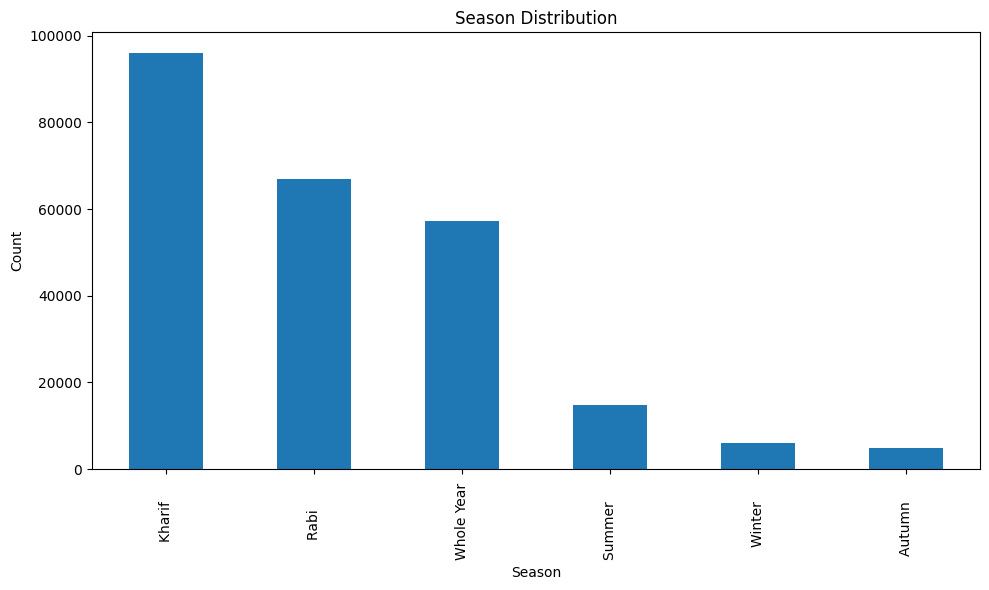

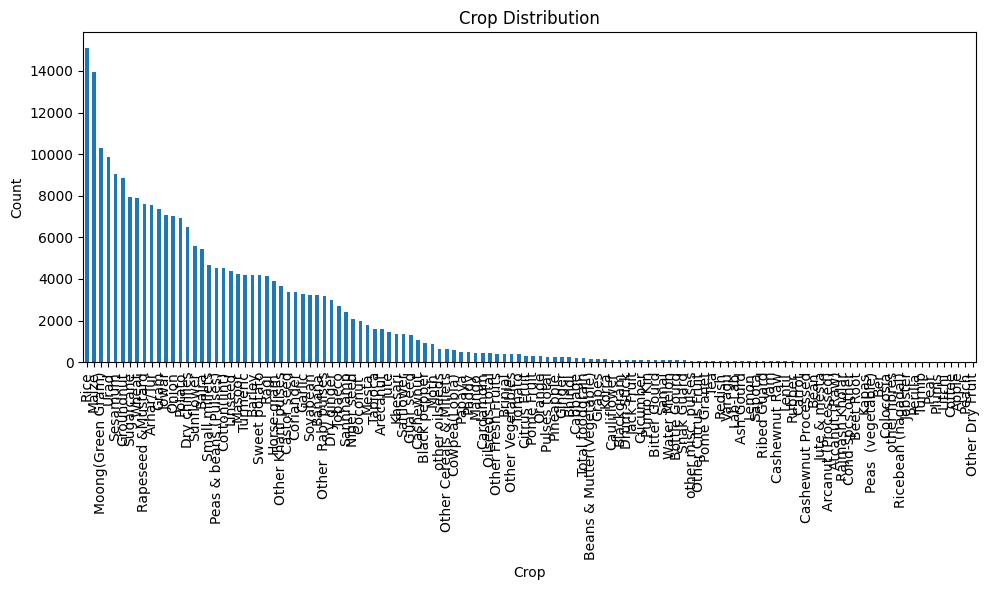

Column: State_Name
Highest Value: West Bengal
Mode Value: Uttar Pradesh
Lowest Value: Andaman and Nicobar Islands

Column: District_Name
Highest Value: ZUNHEBOTO
Mode Value: BIJAPUR
Lowest Value: 24 PARAGANAS NORTH

Column: Crop_Year
Highest Value: 2015
Mode Value: 2003
Lowest Value: 1997

Column: Season
Highest Value: Winter     
Mode Value: Kharif     
Lowest Value: Autumn     

Column: Crop
Highest Value: other oilseeds
Mode Value: Rice
Lowest Value: Apple



In [5]:

# Write distinct values of each column to separate text files
for column in data.columns[:-2]:  # Exclude the last two columns
    distinct_values = data[column].unique()
    with open(f"{column}_distinct_values.txt", "w") as file:
        for value in distinct_values:
            file.write(str(value) + "\n")

# Draw bar graphs for each column
for column in data.columns:
    if column not in ["Area", "Production"]:  # Exclude the last two columns
        value_counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        value_counts.plot(kind='bar')
        plt.title(f"{column} Distribution")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

# Print the highest, middle, and lowest values of each column
for column in data.columns:
    if column not in ["Area", "Production"]:  # Exclude the last two columns
        column_data = data[column]
        highest = column_data.max()
        mode = column_data.mode().iloc[0]  # Get the most frequent value
        lowest = column_data.min()
        print(f"Column: {column}")
        print(f"Highest Value: {highest}")
        print(f"Mode Value: {mode}")
        print(f"Lowest Value: {lowest}")
        print()

